In [1]:
# Procesado y tratamiento de los datos
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from numpy.random import seed, randn
from scipy.stats import normaltest
from sklearn.preprocessing import PowerTransformer

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceo del dataset
from imblearn.over_sampling import RandomOverSampler

# División del dataset
from sklearn.model_selection import train_test_split

# Búsqueda de los mejores parámetros
from sklearn.model_selection import GridSearchCV

# Modelos utilizados 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Métricas de evaluación
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Otros
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Lectura del dataset 
data = pd.read_csv('breast-cancer.csv')
# Visualización inicial del conjunto de datos
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Análisis exploratorio de los datos

In [3]:
# Visualizamos la información básica del conjunto de datos
# Indica el número de filas del dataset
# Muestra el número de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Dimensiones del dataset
# Muestra la cantidad de datos y el número de columnas que posee el dataset
data.shape

(569, 32)

In [5]:
# Validación de datos duplicados
data.duplicated().sum()

0

In [6]:
# Número de datos ausentes por variable
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
# Comprobación de la existencia de valores infinitos
is_inf = data.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

In [8]:
# Copiamos el conjunto de datos y transformamos la variable de salida a numérica
df_new = data.copy()
df_new['diagnosis'] = df_new['diagnosis'].map({'B':0, 'M':1})


In [9]:
# Eliminación de datos que son irrelevantes y que podrían afectar el resultado.
df = df_new.drop(['id'], axis=1)

In [10]:
# Visualización de la información estadística del conjunto de datos
# Para las variables numéricas
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


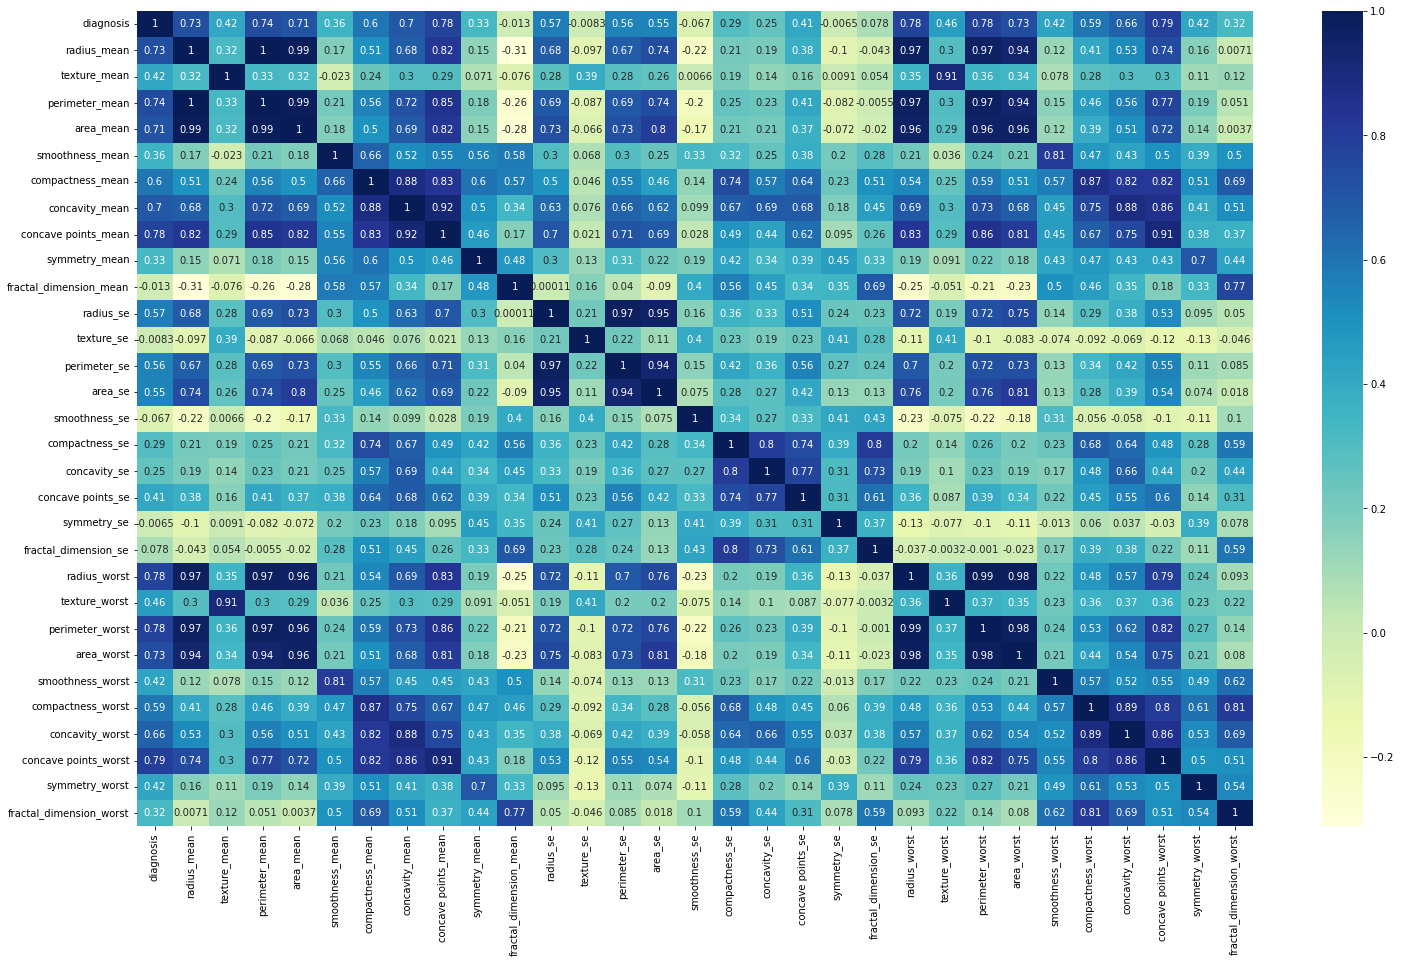

In [11]:
# Validamos correlaciones
correlation = df.corr()
fig = plt.figure (figsize = (25,15))
ax = fig.add_subplot(111)
df.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show()  

In [12]:
# Verificamos cuales son las variables que poseen mas correlación con respecto a la variable de salida
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

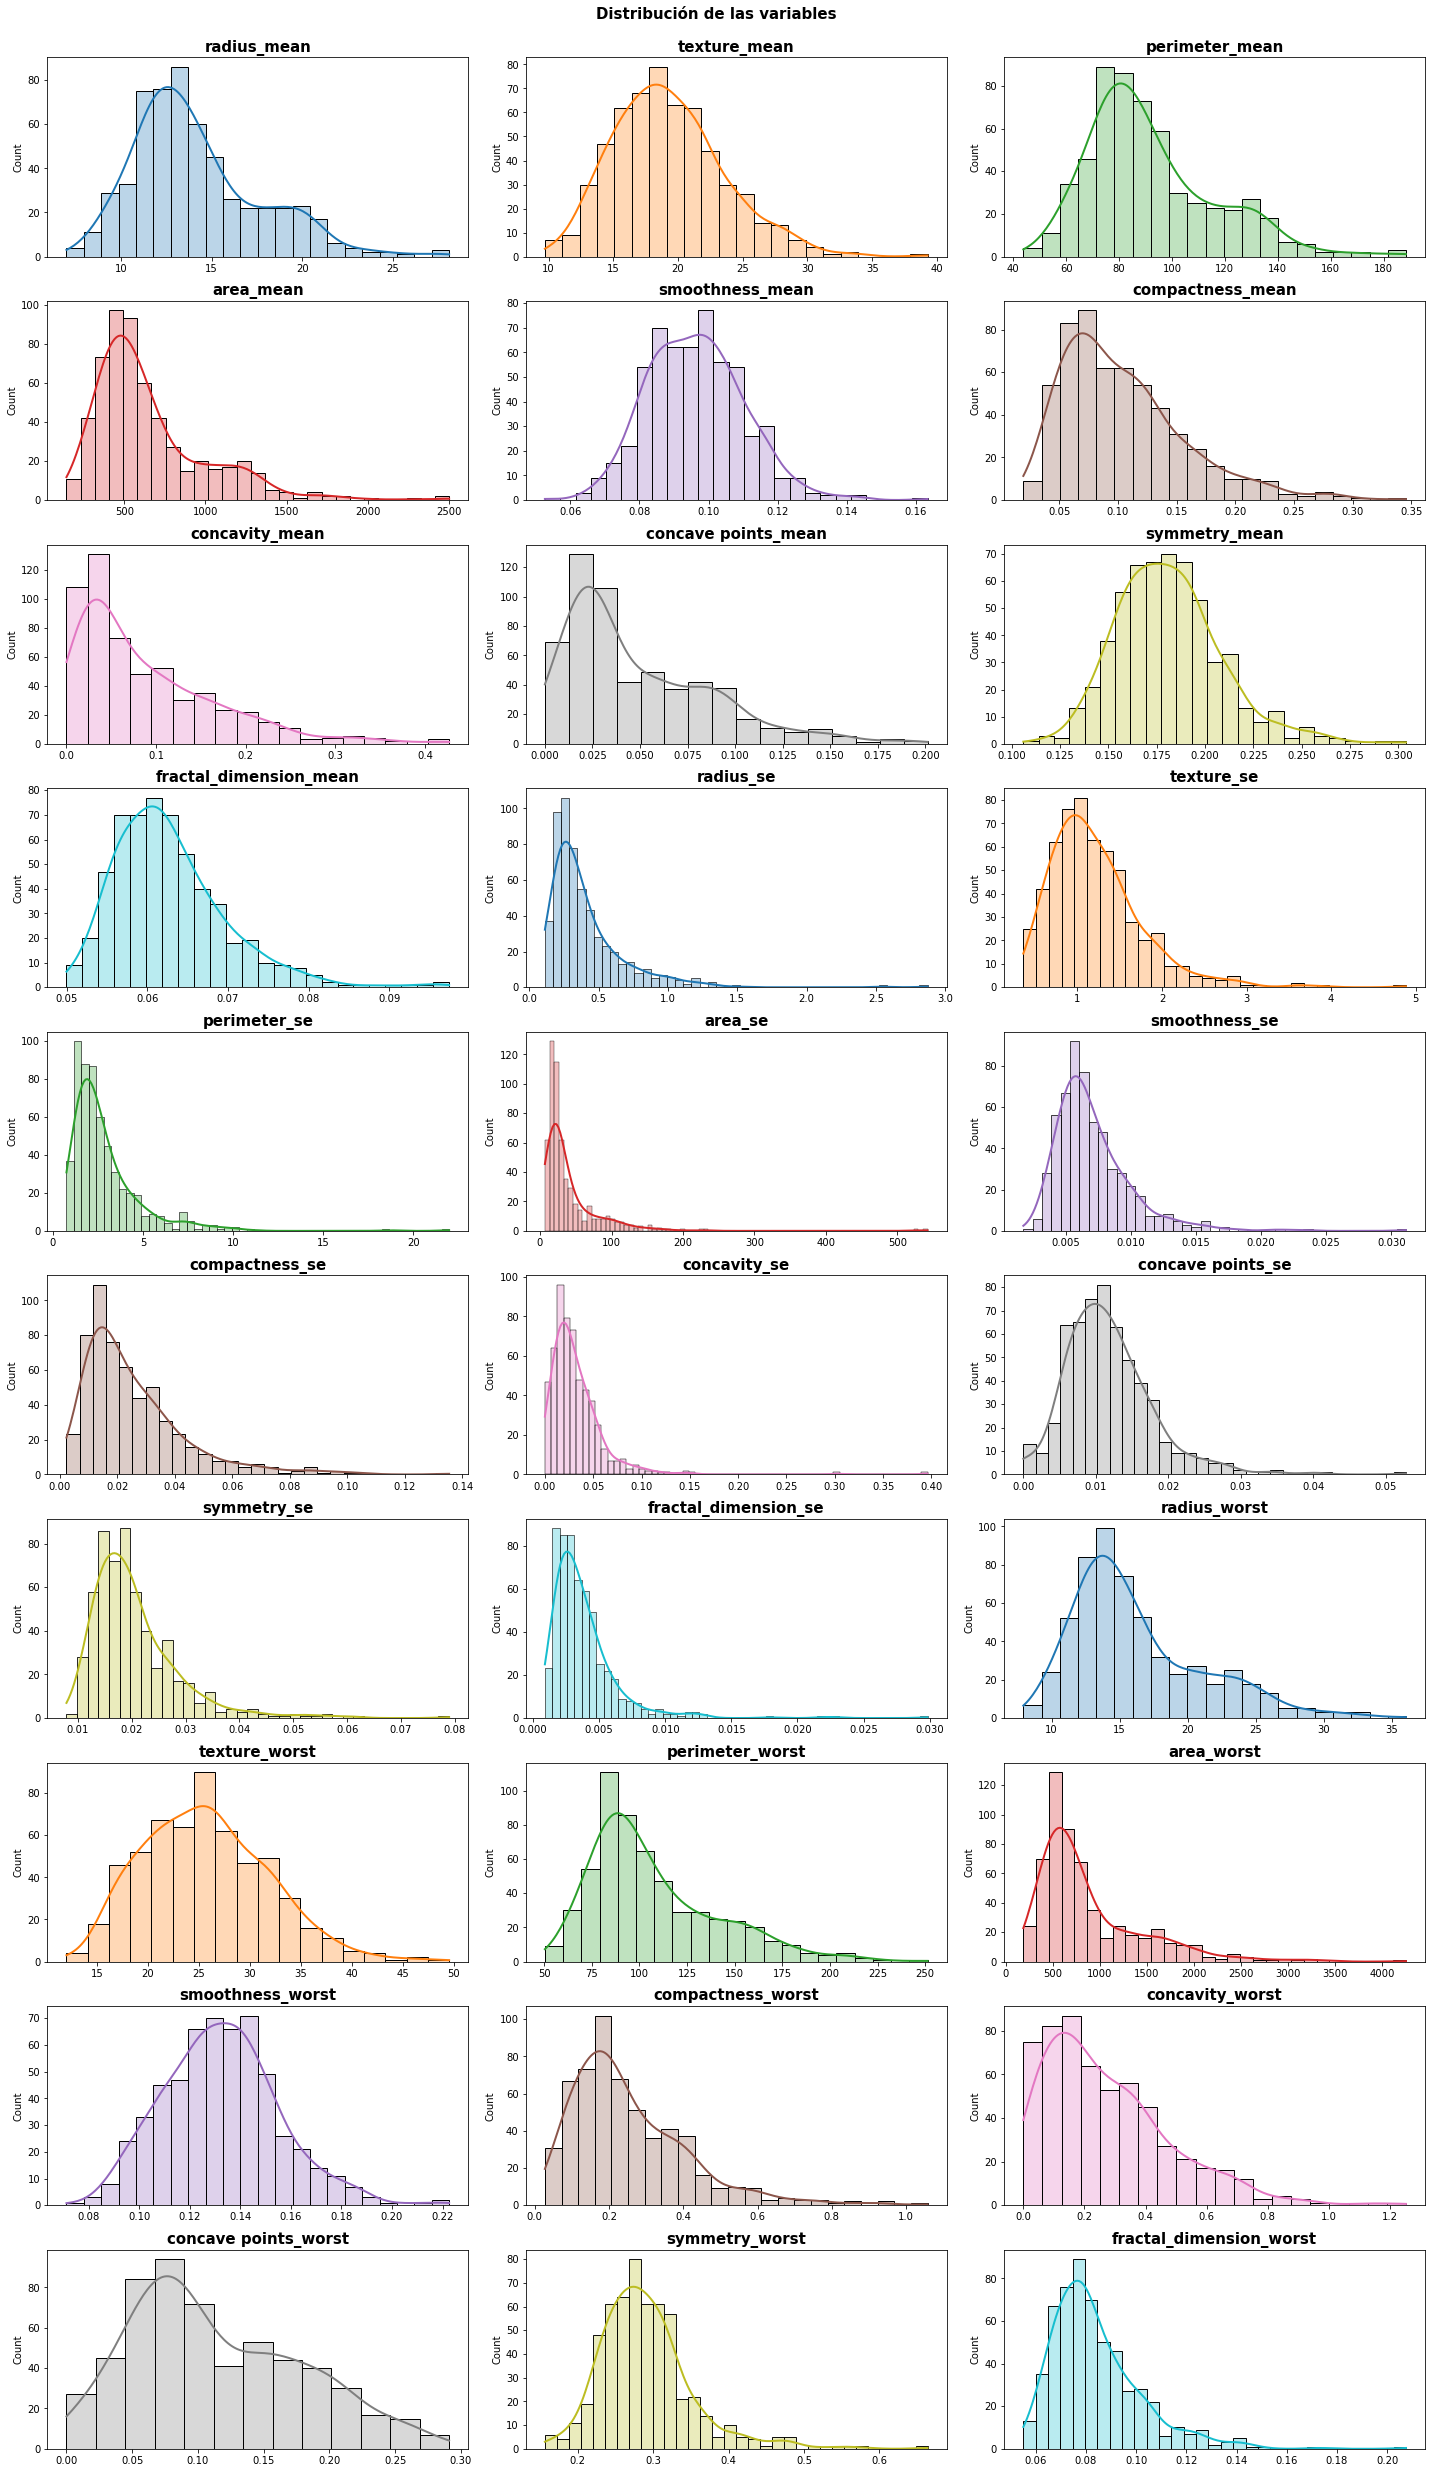

In [13]:
# Gráficas de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20,35))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
# Se elimina la variable de salida
columnas_numeric = columnas_numeric.drop('diagnosis')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numeric):
    # Gráficamos cada columna 
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*4)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Distribución de las variables', fontsize = 15, fontweight = "bold");

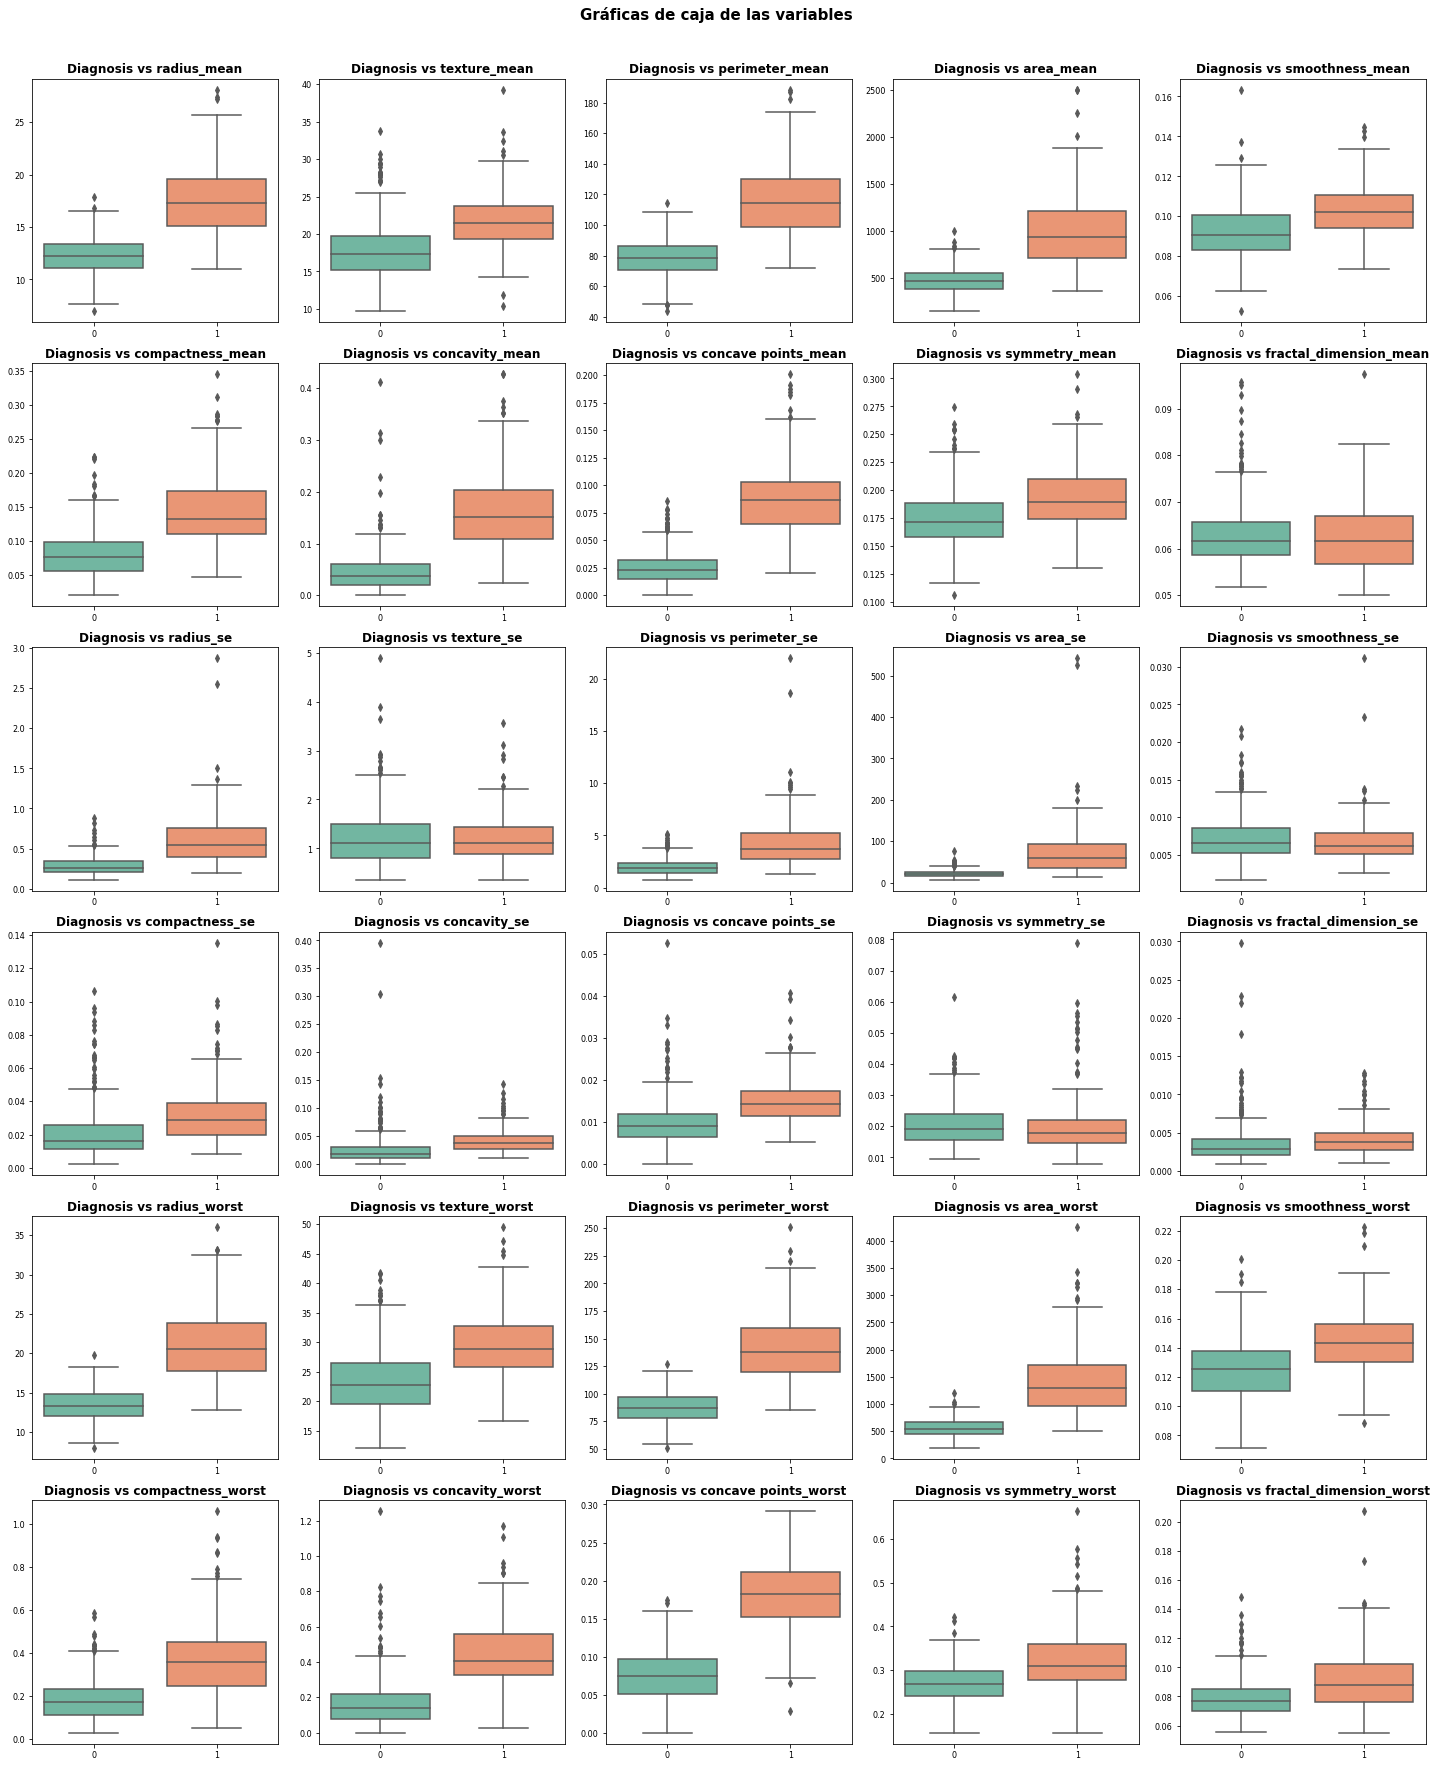

In [14]:
# Gráficas de caja de cada variable según la variable de salida
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20,25))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
# Se elimina la variable de salida
columnas_numeric = columnas_numeric.drop('diagnosis')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numeric):
    # Gráficamos cada columna
    sns.boxplot(
        x     = 'diagnosis',
        y     = colum,
        data  = df,
        color = sns.set_palette("Set2"),
        ax    = axes[i]
    )
    axes[i].set_title(f"Diagnosis vs {colum}", fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    
fig.tight_layout()
plt.subplots_adjust(top=0.94)
fig.suptitle('Gráficas de caja de las variables', fontsize = 15, fontweight = "bold");

## Balanceo del dataset

In [15]:
# Del conjunto de datos general separamos la variable de salida del resto de datos
X_df = df.drop("diagnosis", axis=1)
y_df = df["diagnosis"].copy()

In [16]:
#Validación de la cantidad de ejemplos que posee el dataset segun la variable de salida.
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

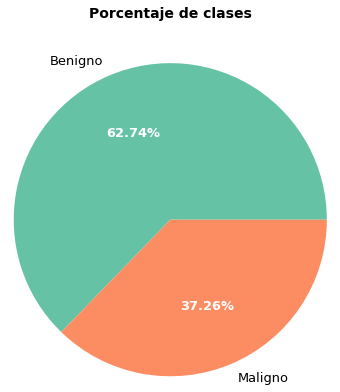

In [17]:
#Creación de una gráfica para representar el porcentaje de las observaciones
Gender = df['diagnosis'].value_counts()
names = 'Benigno','Maligno'
fig5, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Porcentaje de clases', y=1.1,  weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

El conjunto de datos posee un desbalance con 357 casos de tumores benignos y 212 casos de tumores malignos, al entrenar los diferentes algoritmos generaria una matriz de confusión desbalanceda, por lo que se hara uso de la técnica de sobremuestreo para equilibrar la cantidad de datos por clase.

In [18]:
# https://imbalanced-learn.org/dev/over_sampling.html
# Inicializamos el método de sobremuestreo
Ros = RandomOverSampler()#random_state = 0
# Este método duplica las muestras de la clase menos representada
X_Ros, y_Ros = Ros.fit_resample(X_df, y_df)
# Hacemos un nuevo recuento para validar la cantidad de datos por cada caso
Si_Ros = y_Ros.sum()
No_Ros = y_Ros.shape[0]- Si_Ros
print('Tumores Benignos:', No_Ros ,'Tumores Malignos:', Si_Ros)
# Visualizamos el dataset equilibrado para ambos casos 
X_Ros

Tumores Benignos: 357 Tumores Malignos: 357


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
710,14.78,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,0.06654,...,17.31,33.39,114.60,925.1,0.1648,0.3416,0.3024,0.1614,0.3321,0.08911
711,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,0.05623,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
712,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,19.92,25.27,129.00,1233.0,0.1314,0.2236,0.2802,0.1216,0.2792,0.08158


In [19]:
# Función para gráficar el diagrama de probabilidad normal de cada variable y verificar si siguen una distribución normal 
def normalidad_variable_numerica(col):
    stats.probplot(X_Ros[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

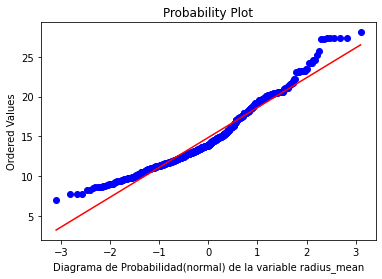

Columna radius_mean no sigue una distribución normal


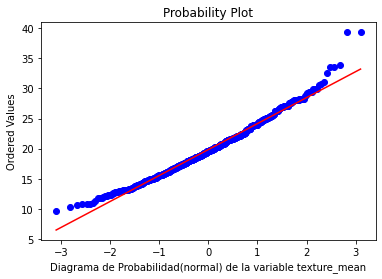

Columna texture_mean no sigue una distribución normal


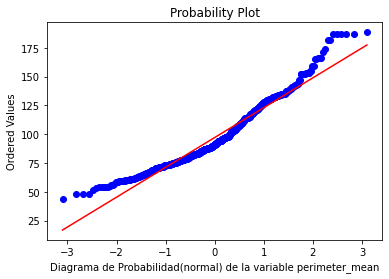

Columna perimeter_mean no sigue una distribución normal


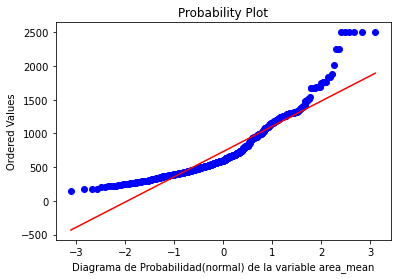

Columna area_mean no sigue una distribución normal


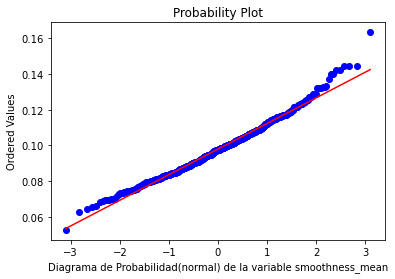

Columna smoothness_mean no sigue una distribución normal


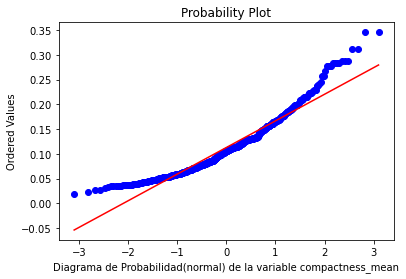

Columna compactness_mean no sigue una distribución normal


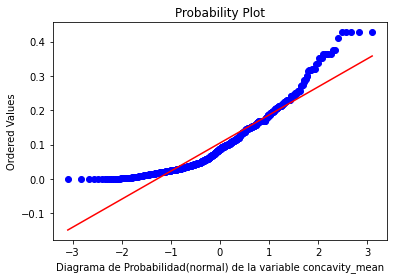

Columna concavity_mean no sigue una distribución normal


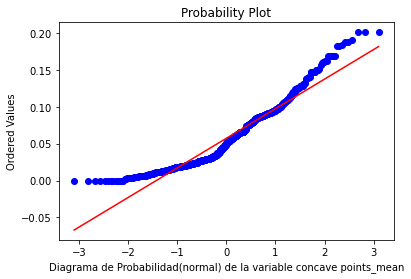

Columna concave points_mean no sigue una distribución normal


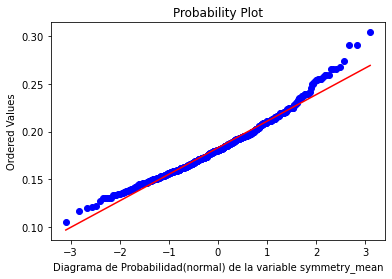

Columna symmetry_mean no sigue una distribución normal


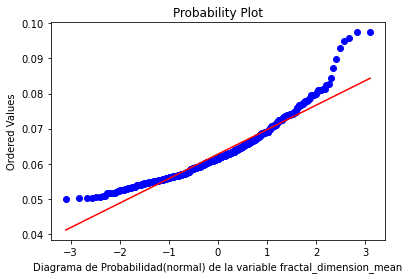

Columna fractal_dimension_mean no sigue una distribución normal


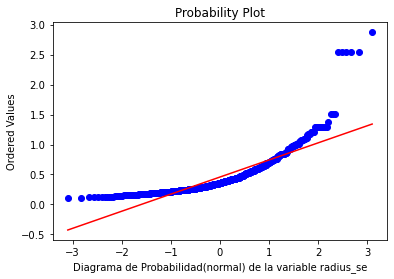

Columna radius_se no sigue una distribución normal


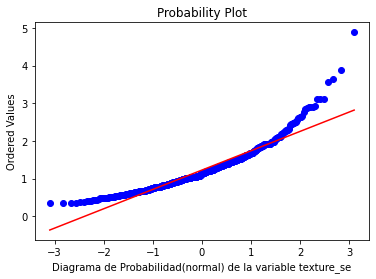

Columna texture_se no sigue una distribución normal


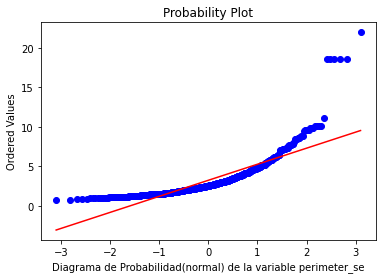

Columna perimeter_se no sigue una distribución normal


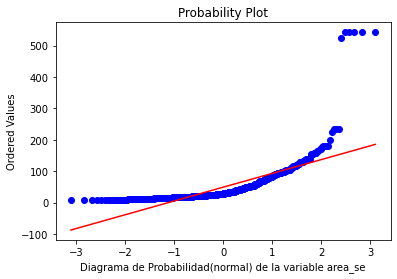

Columna area_se no sigue una distribución normal


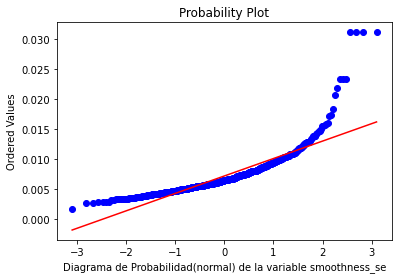

Columna smoothness_se no sigue una distribución normal


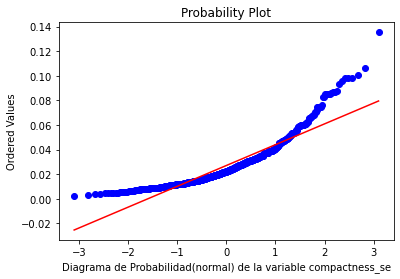

Columna compactness_se no sigue una distribución normal


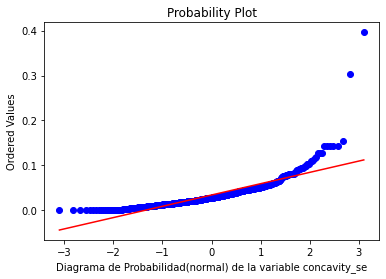

Columna concavity_se no sigue una distribución normal


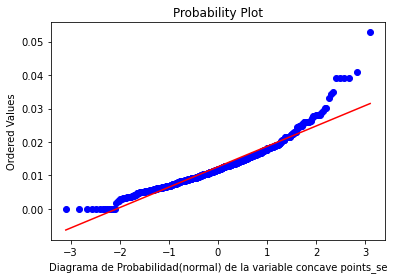

Columna concave points_se no sigue una distribución normal


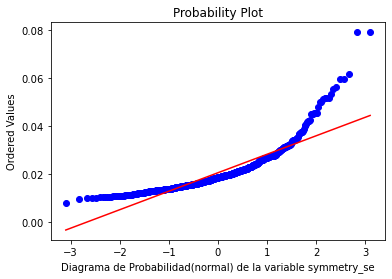

Columna symmetry_se no sigue una distribución normal


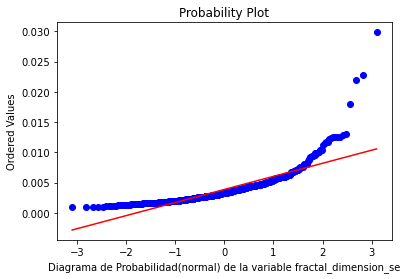

Columna fractal_dimension_se no sigue una distribución normal


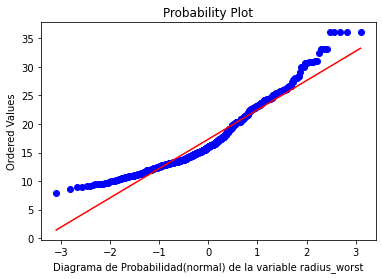

Columna radius_worst no sigue una distribución normal


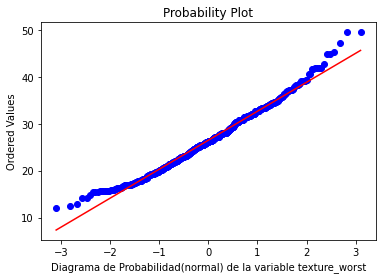

Columna texture_worst no sigue una distribución normal


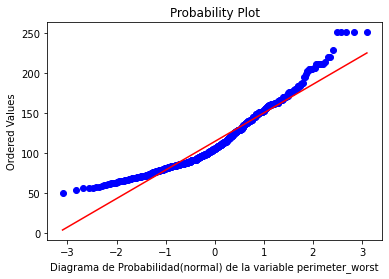

Columna perimeter_worst no sigue una distribución normal


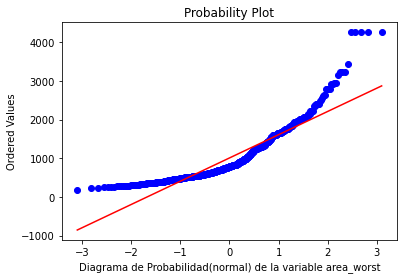

Columna area_worst no sigue una distribución normal


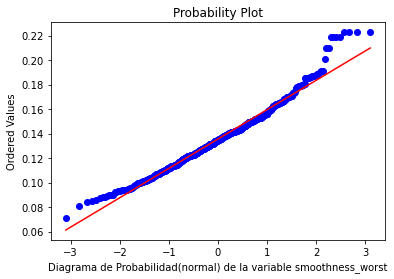

Columna smoothness_worst no sigue una distribución normal


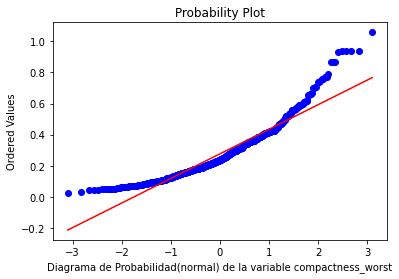

Columna compactness_worst no sigue una distribución normal


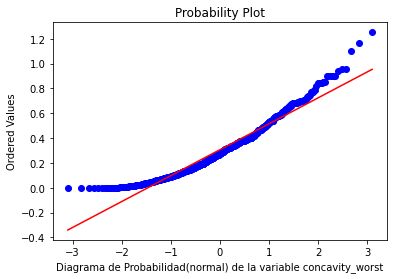

Columna concavity_worst no sigue una distribución normal


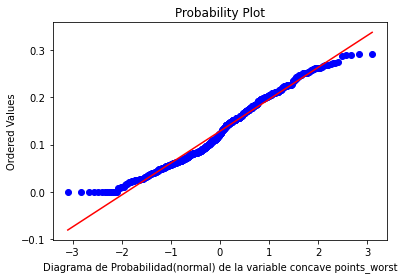

Columna concave points_worst no sigue una distribución normal


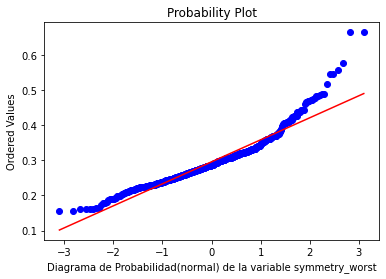

Columna symmetry_worst no sigue una distribución normal


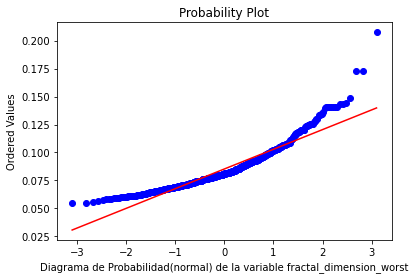

Columna fractal_dimension_worst no sigue una distribución normal


In [20]:
# Seleccionamos las columnas a graficar
columnas_numericas = X_Ros.select_dtypes(['int', 'float']).columns
# Recorremos cada columna
for num_col in columnas_numericas:
    _, pval = stats.normaltest(X_Ros[num_col])
    normalidad_variable_numerica(num_col)
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

In [21]:
# Seleccionamos los datos que serán transformados
variables = pd.DataFrame(X_Ros)
# Inicializamos el método de transformación
pt = PowerTransformer(method='yeo-johnson', standardize=True)
# Pasamos las varibles que serán transformadas
skl_yeojohnson = pt.fit(variables)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(variables)
# Transformamos a un DataFrame de Pandas
X_transform = pd.DataFrame(skl_yeojohnson, columns=X_Ros.columns, index=X_Ros.index)
# Visualizamos los cambios aplicados
X_transform

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.897377,-2.707250,1.022189,0.886522,1.375930,2.126696,1.784982,1.758401,1.871012,1.854140,...,1.409097,-1.604121,1.623802,1.439761,1.114563,1.860883,1.642332,1.864858,2.086497,1.655245
1,1.393925,-0.421086,1.299549,1.402736,-0.926700,-0.561188,0.016087,0.522073,0.022457,-0.915826,...,1.363824,-0.444012,1.201216,1.393537,-0.435161,-0.470480,-0.157021,0.866682,-0.209051,0.453391
2,1.234017,0.400420,1.222707,1.225992,0.843236,0.987256,1.193122,1.529431,0.899225,-0.273257,...,1.190095,-0.084911,1.083644,1.193487,0.446842,1.048852,0.808249,1.595903,1.100764,0.370192
3,-0.928379,0.205672,-0.707515,-0.998454,2.628987,2.166354,1.487750,1.198984,2.284666,2.671575,...,-0.324570,0.073098,-0.287117,-0.650652,2.553567,2.266414,1.575420,1.771075,3.191986,2.488698
4,1.344017,-1.366031,1.356443,1.362771,0.229865,0.567862,1.197650,1.184339,0.011272,-0.485273,...,1.054491,-1.744619,1.077882,1.069920,0.161133,-0.310993,0.605583,0.545665,-0.995672,-0.358439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1.315097,1.771471,1.254764,1.311742,0.055495,0.010750,0.720163,1.076595,-0.205777,-1.208326,...,1.205347,1.747634,1.131075,1.212668,-0.774531,-0.420959,0.254051,0.549843,-0.553232,-1.274067
710,0.134657,0.964886,0.175164,0.113381,1.305865,0.811406,0.532079,0.939030,0.522690,0.711558,...,0.200131,1.101626,0.203753,0.215032,1.205511,0.631951,0.161077,0.530327,0.715457,0.458493
711,2.395456,1.414167,2.431964,2.505038,0.767104,1.466418,2.018166,1.973264,0.874208,-1.009627,...,2.357554,0.815371,2.420461,2.448470,0.089639,1.053782,1.565596,1.830565,-0.416240,-0.557813
712,0.474103,-0.350488,0.458938,0.493146,0.013732,0.219582,0.124254,0.262827,0.201880,0.140930,...,0.666092,-0.127910,0.579153,0.687526,-0.095003,-0.158814,0.048974,-0.044430,-0.132107,-0.010320


In [22]:
# Unimos nuevamente la variable de salida al dataset para poder realizar la división de los datos
data_clean= pd.concat([X_transform,y_Ros], axis=1,sort=True)
# Visualizamos los cambios aplicados
data_clean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.897377,-2.707250,1.022189,0.886522,1.375930,2.126696,1.784982,1.758401,1.871012,1.854140,...,-1.604121,1.623802,1.439761,1.114563,1.860883,1.642332,1.864858,2.086497,1.655245,1
1,1.393925,-0.421086,1.299549,1.402736,-0.926700,-0.561188,0.016087,0.522073,0.022457,-0.915826,...,-0.444012,1.201216,1.393537,-0.435161,-0.470480,-0.157021,0.866682,-0.209051,0.453391,1
2,1.234017,0.400420,1.222707,1.225992,0.843236,0.987256,1.193122,1.529431,0.899225,-0.273257,...,-0.084911,1.083644,1.193487,0.446842,1.048852,0.808249,1.595903,1.100764,0.370192,1
3,-0.928379,0.205672,-0.707515,-0.998454,2.628987,2.166354,1.487750,1.198984,2.284666,2.671575,...,0.073098,-0.287117,-0.650652,2.553567,2.266414,1.575420,1.771075,3.191986,2.488698,1
4,1.344017,-1.366031,1.356443,1.362771,0.229865,0.567862,1.197650,1.184339,0.011272,-0.485273,...,-1.744619,1.077882,1.069920,0.161133,-0.310993,0.605583,0.545665,-0.995672,-0.358439,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1.315097,1.771471,1.254764,1.311742,0.055495,0.010750,0.720163,1.076595,-0.205777,-1.208326,...,1.747634,1.131075,1.212668,-0.774531,-0.420959,0.254051,0.549843,-0.553232,-1.274067,1
710,0.134657,0.964886,0.175164,0.113381,1.305865,0.811406,0.532079,0.939030,0.522690,0.711558,...,1.101626,0.203753,0.215032,1.205511,0.631951,0.161077,0.530327,0.715457,0.458493,1
711,2.395456,1.414167,2.431964,2.505038,0.767104,1.466418,2.018166,1.973264,0.874208,-1.009627,...,0.815371,2.420461,2.448470,0.089639,1.053782,1.565596,1.830565,-0.416240,-0.557813,1
712,0.474103,-0.350488,0.458938,0.493146,0.013732,0.219582,0.124254,0.262827,0.201880,0.140930,...,-0.127910,0.579153,0.687526,-0.095003,-0.158814,0.048974,-0.044430,-0.132107,-0.010320,1


## División del conjunto de datos

In [23]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [24]:
# Division del conjunto de datos en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(data_clean, stratify='diagnosis')

In [25]:
# Verificamos las particiones realizadas
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 428
Longitud del Validation Set: 143
Longitud del Test Set: 143


In [26]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("diagnosis", axis=1)
y_train = train_set["diagnosis"].copy()

In [27]:
# Conjunto de datos de pruebas
X_val = val_set.drop("diagnosis", axis=1)
y_val = val_set["diagnosis"].copy()

In [28]:
# Conjunto de datos de test
X_test = test_set.drop("diagnosis", axis=1)
y_test = test_set["diagnosis"].copy()

## Selección de los mejores modelos

In [29]:
# Pruebas con diferentes modelos 
models = []
models.append(['Logistic Regreesion', LogisticRegression()])
models.append(['SVM', SVC()])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])
models.append(['Ada Boost', AdaBoostClassifier()])

# Entrenamiento de los diferentes modelos
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # Evaluación de los diferentes modelos
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

Logistic Regreesion: 96.72% (3.20%)
SVM: 97.67% (2.55%)
KNeighbors: 95.34% (2.33%)
GaussianNB: 93.93% (3.78%)
BernoulliNB: 94.62% (4.07%)
Decision Tree: 94.86% (3.28%)
Random Forest: 97.43% (2.44%)
Ada Boost: 97.44% (2.43%)


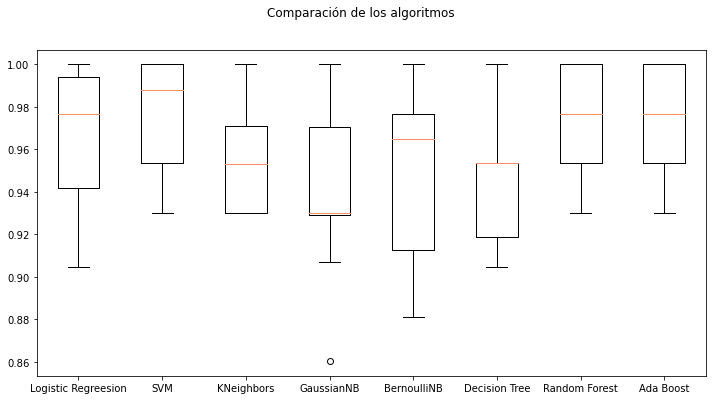

In [30]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig14 = plt.figure(figsize =(12,6))
fig14.suptitle('Comparación de los algoritmos')
ax = fig14.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hiperparametrización de los mejores modelos

In [31]:
# Búsqueda de los mejores parámetros para "LogisticRegression"
parameters1 = {"penalty" : ["l1", "l2", "elasticnet", None],
              "random_state": [0, 3, 5, 7, 10, None],
              "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
              }

model_LogisticRegreesion = LogisticRegression()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid = GridSearchCV(estimator=model_LogisticRegreesion, param_grid=parameters1, cv=kFold, return_train_score=True)
grid_result1= grid.fit(X_train, y_train)

# mejores parámetros
grid_result1.best_params_

{'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}

In [32]:
# Búsqueda de los mejores parámetros para "K-Neighbors"
parameters5 = {"n_neighbors" : [1,3,7,9],
              "weights": ["uniform", "distance", None],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
              }

model_KNN = KNeighborsClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid5 = GridSearchCV(estimator=model_KNN, param_grid=parameters5, cv=kFold, return_train_score=True)
grid_result5= grid5.fit(X_train, y_train)

# mejores parámetros
grid_result5.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}

In [33]:
# Búsqueda de los mejores parámetros para "Árboles de decisión"
parameters2 = {"max_depth": [1, 2, 3, None],
              "splitter": ["best", "random"],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_DTC = DecisionTreeClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid2 = GridSearchCV(estimator=model_DTC, param_grid=parameters2, cv=kFold, return_train_score=True)
grid_result2= grid2.fit(X_train, y_train)

# mejores parámetros
grid_result2.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'splitter': 'best'}

In [34]:
# Búsqueda de los mejores parámetros para "Bosques aleatorios"
parameters3 = {"max_depth": [1, 2, 3, None],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_RFC = RandomForestClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid3 = GridSearchCV(estimator=model_RFC, param_grid=parameters3, cv=kFold, return_train_score=True)
grid_result3= grid3.fit(X_train, y_train)

# mejores parámetros
grid_result3.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1}

In [35]:
# Búsqueda de los mejores parámetros para "AdaBoostClassifier"
parameters4 = {"n_estimators": [50, 100, 150, 200],
              "learning_rate": [1.0, 1.5, 2.0],
              "algorithm": ["SAMME", "SAMME.R"],
              "random_state": [1,3,5,None]
              }

model_ABC = AdaBoostClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid4 = GridSearchCV(estimator=model_ABC, param_grid=parameters4, cv=kFold, return_train_score=True)
grid_result4= grid4.fit(X_train, y_train)

# mejores parámetros
grid_result4.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.5,
 'n_estimators': 200,
 'random_state': 1}

## Evaluación del mejor modelo

In [36]:
# Prueba de los mejores modelos con los parámetros encontrados
models_hiper = []
models_hiper.append(['Logistic Regreesion', LogisticRegression(**grid_result1.best_params_)])
models_hiper.append(['KNeighbors', KNeighborsClassifier(**grid_result5.best_params_)])
models_hiper.append(['Decision Tree', DecisionTreeClassifier(**grid_result2.best_params_)])
models_hiper.append(['Random Forest', RandomForestClassifier(**grid_result3.best_params_)])
models_hiper.append(['Ada Boost', AdaBoostClassifier(**grid_result4.best_params_)])

# Entrenamiento de los modelos
results2 = []
names2 = []
scoring2 = 'accuracy'
for name, model in models_hiper:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results2 = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring2)
    results2.append(cv_results2)
    names2.append(name)
    # Evaluación de los diferentes modelos
    print(f"{name}: {cv_results2.mean()*100.0:,.2f}% ({cv_results2.std()*100.0:,.2f}%)")

Logistic Regreesion: 97.19% (3.13%)
KNeighbors: 97.67% (2.55%)
Decision Tree: 93.00% (4.54%)
Random Forest: 97.67% (2.33%)
Ada Boost: 97.67% (2.33%)


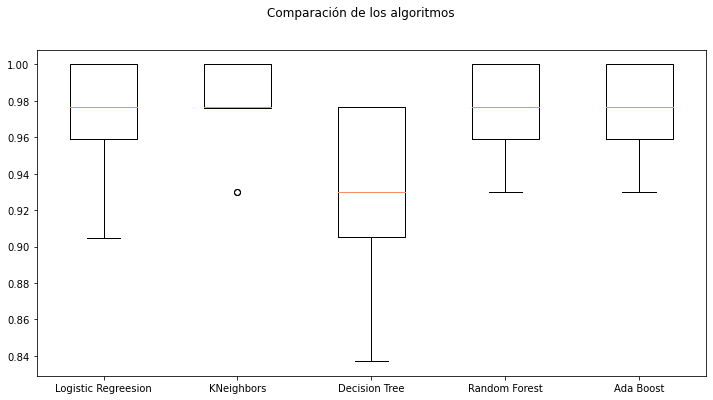

In [37]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig15 = plt.figure(figsize =(12,6))
fig15.suptitle('Comparación de los algoritmos')
ax = fig15.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [38]:
# Entrenamiento y prueba con el mejor modelo 
# Inicializamos el modelo 
mejor_modelo = RandomForestClassifier(**grid_result3.best_params_)
# Le pasamos los datos de entrenamiento 
mejor_modelo.fit(X_train,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred = mejor_modelo.predict(X_val)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_val, y_pred)

0.958041958041958

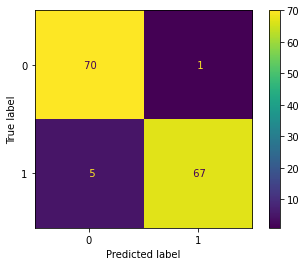

In [39]:
# Resultados de la matriz de confusión con los datos de prueba 
plot_confusion_matrix(mejor_modelo, X_val, y_val, values_format='3g')

In [40]:
# Reporte de los resultados que se obtuvieron con los datos de prueba 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.99      0.93      0.96        72

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [41]:
# Realizamos una nueva predición con los datos de test
y_pred2 = mejor_modelo.predict(X_test)

# Evaluamos el rendimiento del modelo con los datos de test
accuracy_score(y_test, y_pred2)

0.986013986013986

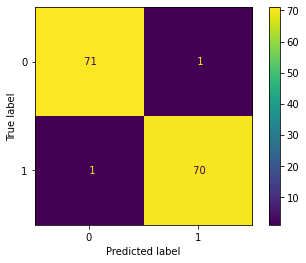

In [42]:
# Resultados de la matriz de confusión con los datos de test
plot_confusion_matrix(mejor_modelo, X_test, y_test, values_format='3g')

In [43]:
# Reporte de los resultados que se obtuvieron con los datos de test
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.99      0.99      0.99        71

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



## Reducción de características

In [44]:
# Selección de las características más importantes
feature_importances = {name: score for name, score in zip(list(X_train), mejor_modelo.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(15)

area_worst              0.077604
concavity_mean          0.068353
perimeter_worst         0.067575
compactness_mean        0.057658
radius_mean             0.054825
concave points_mean     0.052873
radius_worst            0.047398
concavity_worst         0.040727
area_mean               0.039289
concave points_worst    0.038438
perimeter_mean          0.037404
concave points_se       0.036678
perimeter_se            0.036159
radius_se               0.035706
area_se                 0.034539
dtype: float64

In [45]:
# Extraemos las características con mas relevancia para el algoritmo
columns = list(feature_importances_sorted.head(15).index)
columns

['area_worst',
 'concavity_mean',
 'perimeter_worst',
 'compactness_mean',
 'radius_mean',
 'concave points_mean',
 'radius_worst',
 'concavity_worst',
 'area_mean',
 'concave points_worst',
 'perimeter_mean',
 'concave points_se',
 'perimeter_se',
 'radius_se',
 'area_se']

In [46]:
# Aplicamos la reducción de características a los datasets de entrenamiento y pruebas
X_train_reduced = X_train[columns].copy()
X_val_reduced = X_val[columns].copy()
X_test_reduced = X_test[columns].copy()
X_train_reduced.head(3)

,area_worst,concavity_mean,perimeter_worst,compactness_mean,radius_mean,concave points_mean,radius_worst,concavity_worst,area_mean,concave points_worst,perimeter_mean,concave points_se,perimeter_se,radius_se,area_se
608,0.533812,0.758932,0.598330,0.552503,0.512530,0.834936,0.560101,0.430975,0.494794,0.486949,0.521510,0.371314,0.446315,0.318963,0.465144
340,0.094974,-0.086013,0.111571,0.223484,0.036060,-0.215723,0.070592,0.500841,0.032019,0.246410,0.046771,0.121052,0.082232,-0.120488,0.046576
10,0.575317,-0.925345,0.450445,-0.877507,0.452273,-0.501779,0.544799,-0.737625,0.456966,-0.377280,0.373375,-0.823826,-0.074035,0.043352,0.350774


## Prueba del modelo final 

In [47]:
# Prueba de los mejores modelos con el dataset reducido
models_hiper2 = []
models_hiper2.append(['Logistic Regreesion', LogisticRegression(**grid_result1.best_params_)])
models_hiper2.append(['KNeighbors', KNeighborsClassifier(**grid_result5.best_params_)])
models_hiper2.append(['Decision Tree', DecisionTreeClassifier(**grid_result2.best_params_)])
models_hiper2.append(['Random Forest', RandomForestClassifier(**grid_result3.best_params_)])
models_hiper2.append(['Ada Boost', AdaBoostClassifier(**grid_result4.best_params_)])

# Entrenamiento de los modelos
results3 = []
names3 = []
scoring3 = 'accuracy'
for name, model in models_hiper2:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results3 = cross_val_score(model, X_train_reduced, y_train, cv=kFold, scoring=scoring3)
    results3.append(cv_results3)
    names3.append(name)
    # Evaluación de los diferentes modelos
    print(f"{name}: {cv_results3.mean()*100.0:,.2f}% ({cv_results3.std()*100.0:,.2f}%)")

Logistic Regreesion: 93.69% (3.61%)
KNeighbors: 95.58% (3.95%)
Decision Tree: 94.18% (3.16%)
Random Forest: 96.04% (2.08%)
Ada Boost: 95.80% (2.70%)


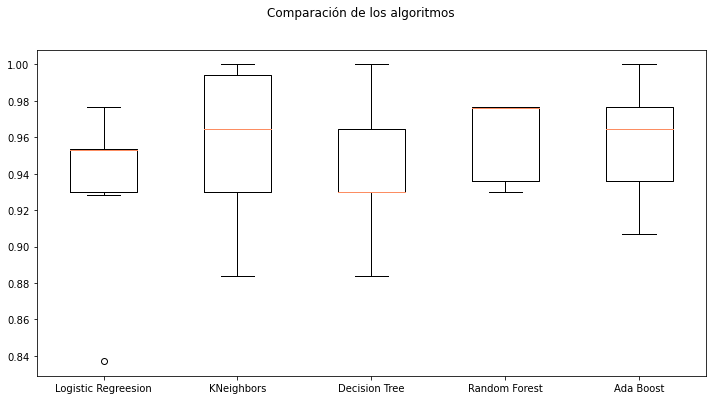

In [48]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos entrenados con el dataset reducido
fig16 = plt.figure(figsize =(12,6))
fig16.suptitle('Comparación de los algoritmos')
ax = fig16.add_subplot(111)
plt.boxplot(results3)
ax.set_xticklabels(names3)
plt.show()

In [49]:
# Probamos el modelo nuevamente con el dataset reducido 
# Inicializamos el modelo 
mejor_modelo2 = RandomForestClassifier(**grid_result3.best_params_)
# Le pasamos los datos de entrenamiento 
mejor_modelo2.fit(X_train_reduced,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred3 = mejor_modelo2.predict(X_val_reduced)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_val, y_pred3)

0.951048951048951

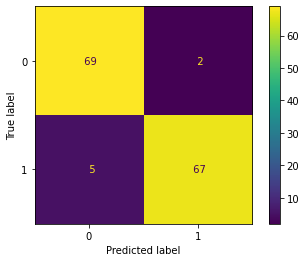

In [50]:
# Resultados de la matriz de confusión con los datos de prueba 
plot_confusion_matrix(mejor_modelo2, X_val_reduced, y_val, values_format='3g')

In [51]:
# Reporte de los resultados que se obtuvieron con los datos de prueba 
print(classification_report(y_val, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.97      0.93      0.95        72

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [52]:
# Realizamos una nueva predición con los datos de test
y_pred4 = mejor_modelo2.predict(X_test_reduced)

# Evaluamos el rendimiento del modelo con los datos de test
accuracy_score(y_test, y_pred4)

0.972027972027972

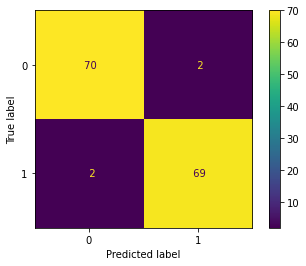

In [53]:
# Resultados de la matriz de confusión con los datos de test
plot_confusion_matrix(mejor_modelo2, X_test_reduced, y_test, values_format='3g')

In [54]:
# Reporte de los resultados que se obtuvieron con los datos de test
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.97      0.97      0.97        71

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

